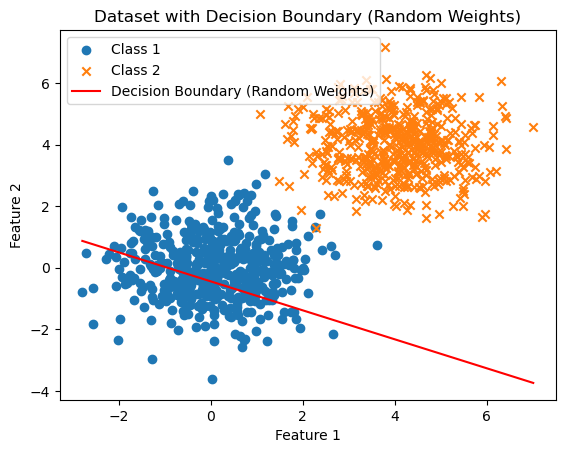

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_dataset(size, separation_level):
    #np.random.seed(42)

    # Class 1 points
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    # Class 2 points with a clear separation
    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    # Combine the two classes
    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y.flatten()

def initialize_weights(num_features):
    return np.random.rand(num_features)

def plot_dataset_with_decision_boundary(X, y, weights, title):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_decision_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_decision_boundary = (-weights[0] / weights[1]) * x_decision_boundary - weights[2] / weights[1]
    plt.plot(x_decision_boundary, y_decision_boundary, '-r', label='Decision Boundary (Random Weights)')
    
    plt.legend()
    plt.show()

# Example usage:
separation_level = 4.0
X, y = generate_linearly_separable_dataset(1000, separation_level)

# Initialize random weights (considering an extra bias term)
random_weights = initialize_weights(X.shape[1] + 1)

# Add bias term to the features
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# Plot dataset with decision boundary using random weights
plot_dataset_with_decision_boundary(X, y, random_weights, 'Dataset with Decision Boundary (Random Weights)')


Number of changes: 2


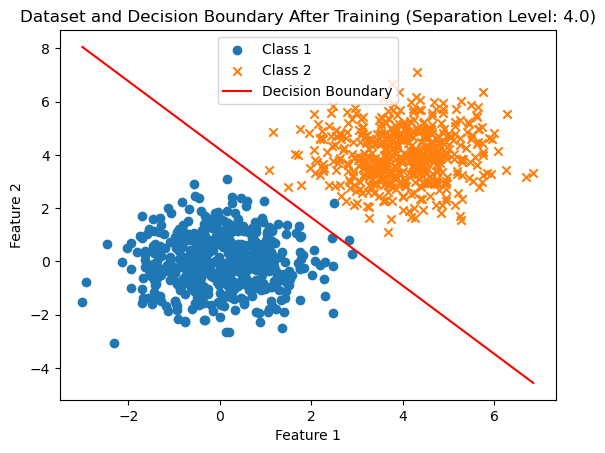

In [2]:


def train_perceptron(X, y, weights, nb_epochs_max):
    for epoch in range(nb_epochs_max):
        nb_changes = 0
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) * y[i] <= 0:
                weights = weights + y[i] * X[i]
                nb_changes += 1
        # Uncomment the next line if you want to print the number of changes every epoch
        # print('Number of changes: %d' % nb_changes)
        if nb_changes == 0:
            print('Early stopping at epoch number %d' % epoch)
            break

    print('Number of changes: %d' % nb_changes)
    return weights

# Example usage:
separation_level = 4.0
X, y = generate_linearly_separable_dataset(1000, separation_level)

# Initialize weights (considering an extra bias term)
initial_weights = initialize_weights(X.shape[1] + 1)

# Add bias term to the features
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# Train perceptron
trained_weights = train_perceptron(X_bias, y, initial_weights, nb_epochs_max=100)

# Plot the dataset and decision boundary
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
plt.title(f'Dataset and Decision Boundary After Training (Separation Level: {separation_level})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
x_decision_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_decision_boundary = (-trained_weights[0] / trained_weights[1]) * x_decision_boundary - trained_weights[2] / trained_weights[1]
plt.plot(x_decision_boundary, y_decision_boundary, '-r', label='Decision Boundary')
plt.legend()
plt.show()

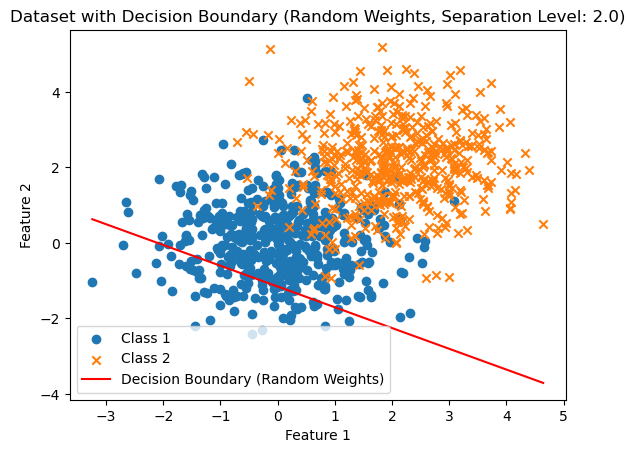

Number of changes: 112


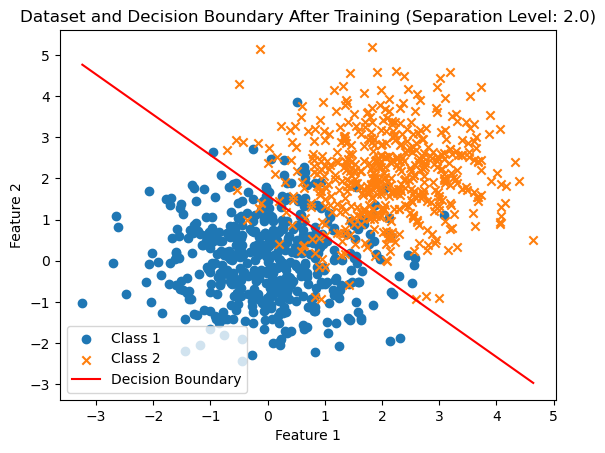

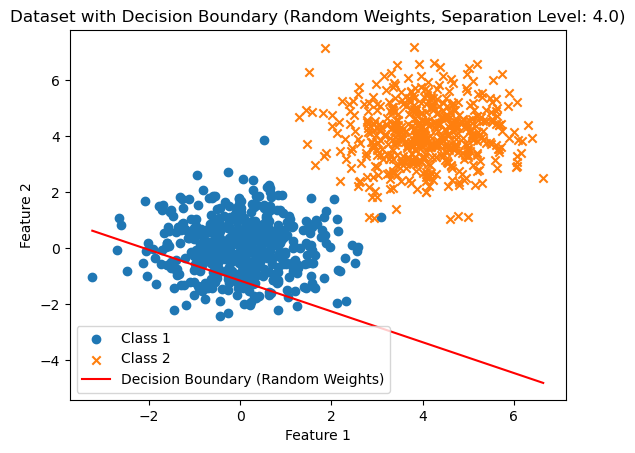

Number of changes: 4


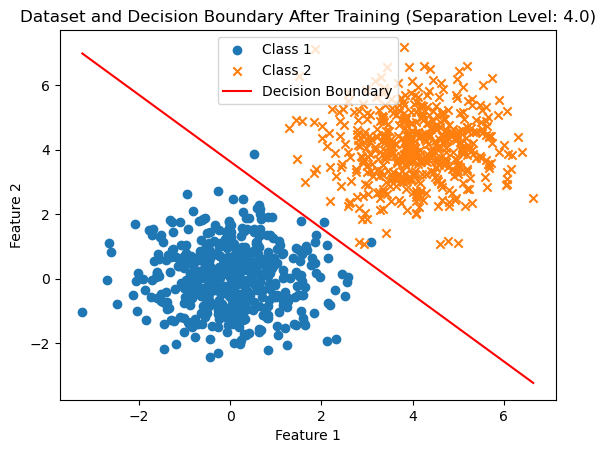

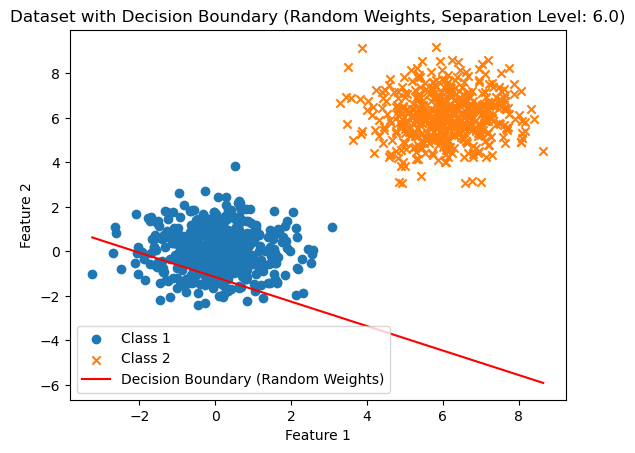

Early stopping at epoch number 3
Number of changes: 0


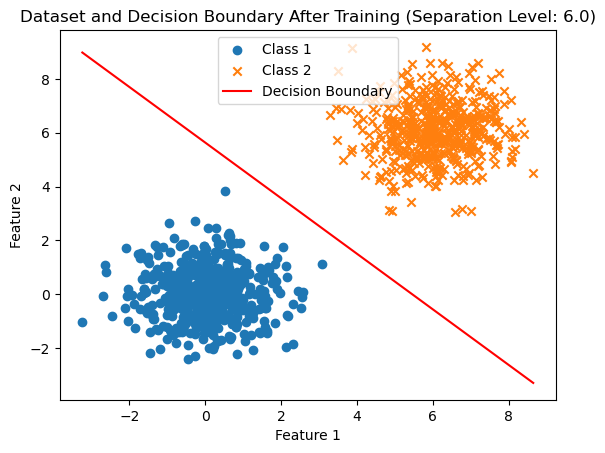

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_dataset(size, separation_level):
    # np.random.seed(42)

    # Class 1 points
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    # Class 2 points with a clear separation
    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    # Combine the two classes
    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y.flatten()

def initialize_weights(num_features):
    return np.random.rand(num_features)

def plot_dataset_with_decision_boundary(X, y, weights, title):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_decision_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_decision_boundary = (-weights[0] / weights[1]) * x_decision_boundary - weights[2] / weights[1]
    plt.plot(x_decision_boundary, y_decision_boundary, '-r', label='Decision Boundary (Random Weights)')
    
    plt.legend()
    plt.show()

def train_perceptron(X, y, weights, nb_epochs_max):
    for epoch in range(nb_epochs_max):
        nb_changes = 0
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) * y[i] <= 0:
                weights = weights + y[i] * X[i]
                nb_changes += 1
        # Uncomment the next line if you want to print the number of changes every epoch
        # print('Number of changes: %d' % nb_changes)
        if nb_changes == 0:
            print('Early stopping at epoch number %d' % epoch)
            break

    print('Number of changes: %d' % nb_changes)
    return weights

# Example usage for different separation levels:
separation_levels = [2.0, 4.0, 6.0]  # Adjust as needed

for separation_level in separation_levels:
    X, y = generate_linearly_separable_dataset(1000, separation_level)

    # Initialize random weights (considering an extra bias term)
    random_weights = initialize_weights(X.shape[1] + 1)

    # Add bias term to the features
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

    # Plot dataset with decision boundary using random weights
    plot_dataset_with_decision_boundary(X, y, random_weights, f'Dataset with Decision Boundary (Random Weights, Separation Level: {separation_level})')

    # Initialize weights (considering an extra bias term)
    initial_weights = initialize_weights(X.shape[1] + 1)

    # Train perceptron
    trained_weights = train_perceptron(X_bias, y, initial_weights, nb_epochs_max=100)

    # Plot the dataset and decision boundary after training
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    plt.title(f'Dataset and Decision Boundary After Training (Separation Level: {separation_level})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_decision_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_decision_boundary = (-trained_weights[0] / trained_weights[1]) * x_decision_boundary - trained_weights[2] / trained_weights[1]
    plt.plot(x_decision_boundary, y_decision_boundary, '-r', label='Decision Boundary')
    plt.legend()
    plt.show()


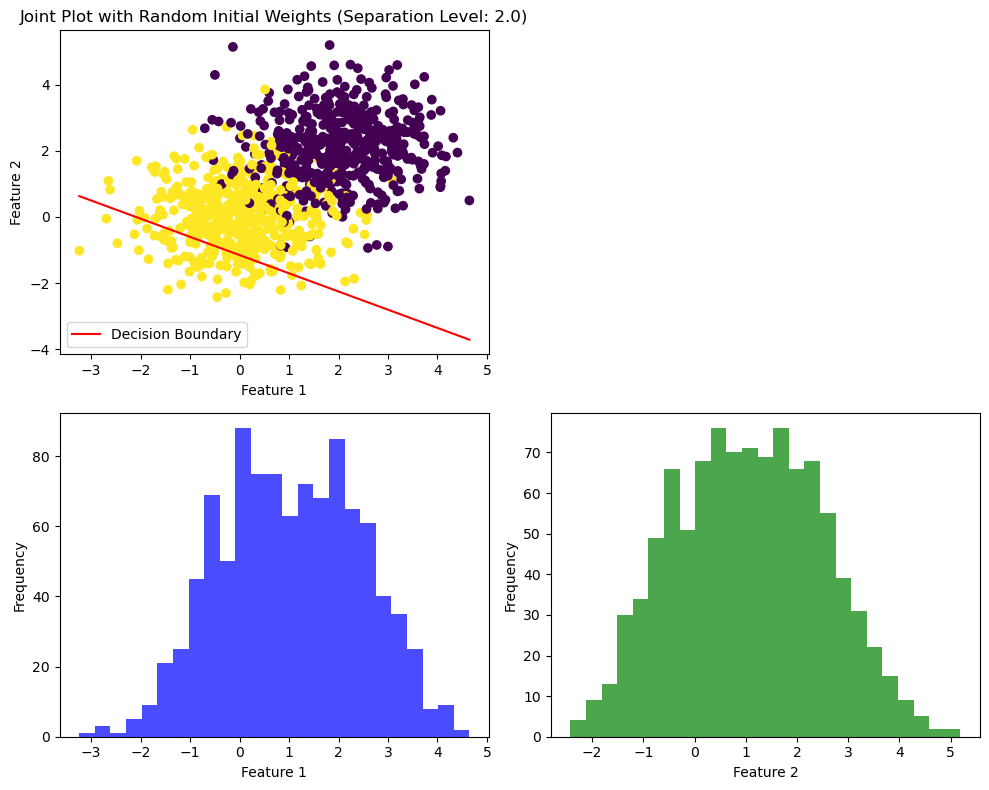

Number of changes: 112


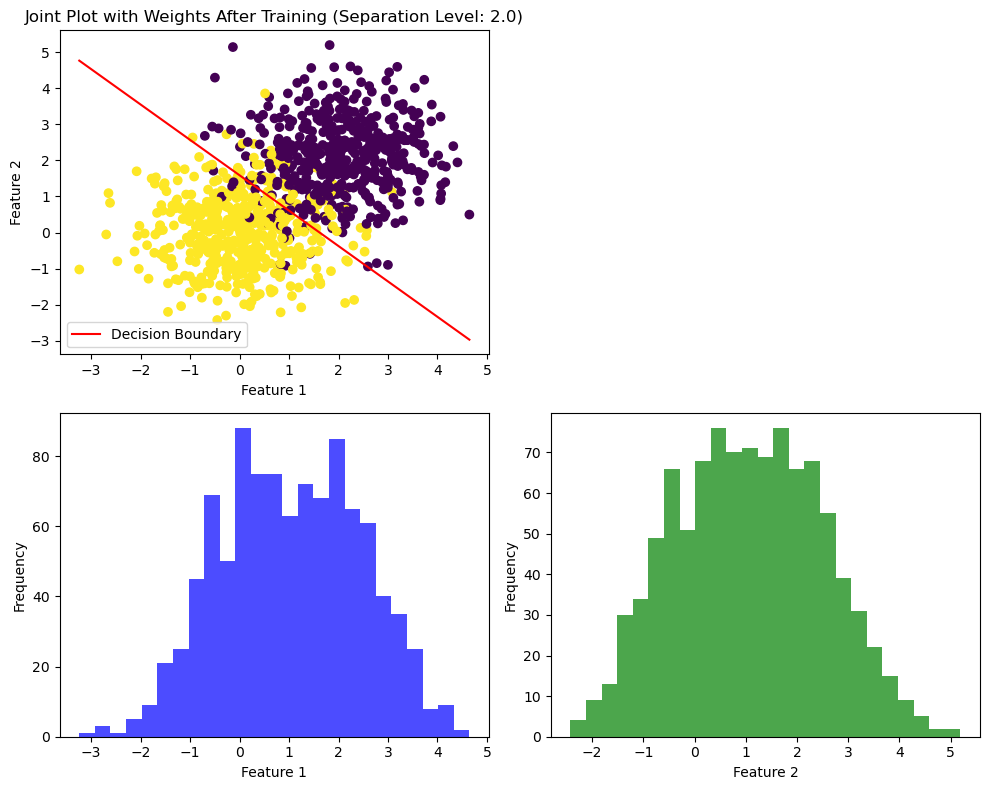

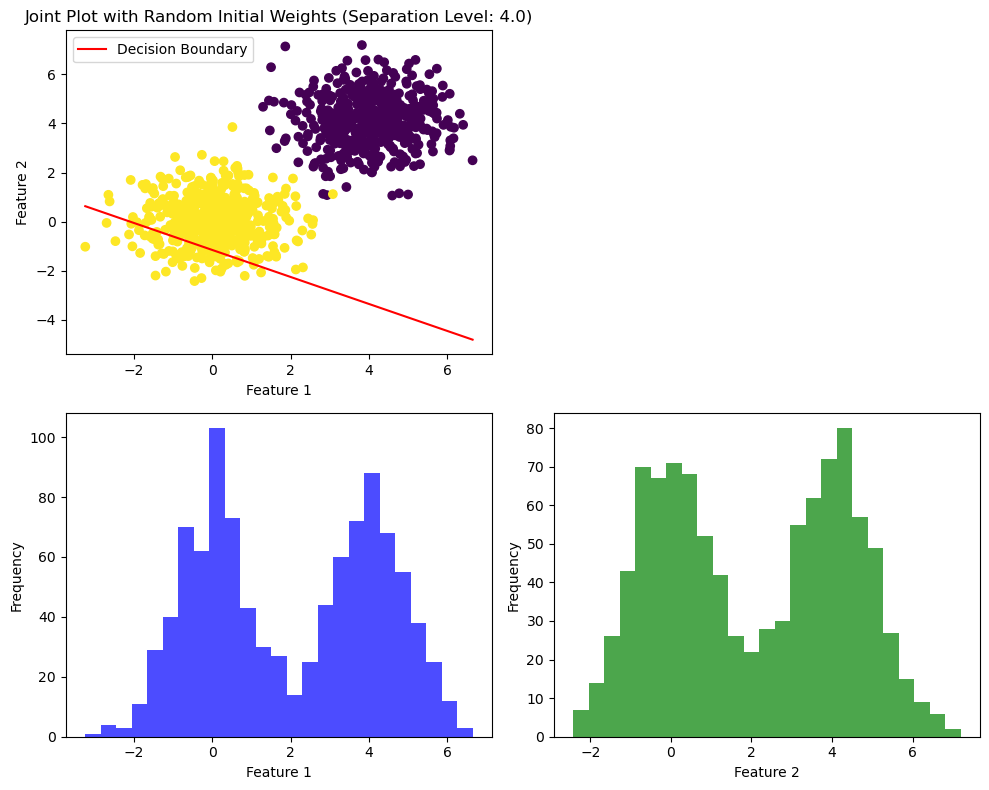

Number of changes: 4


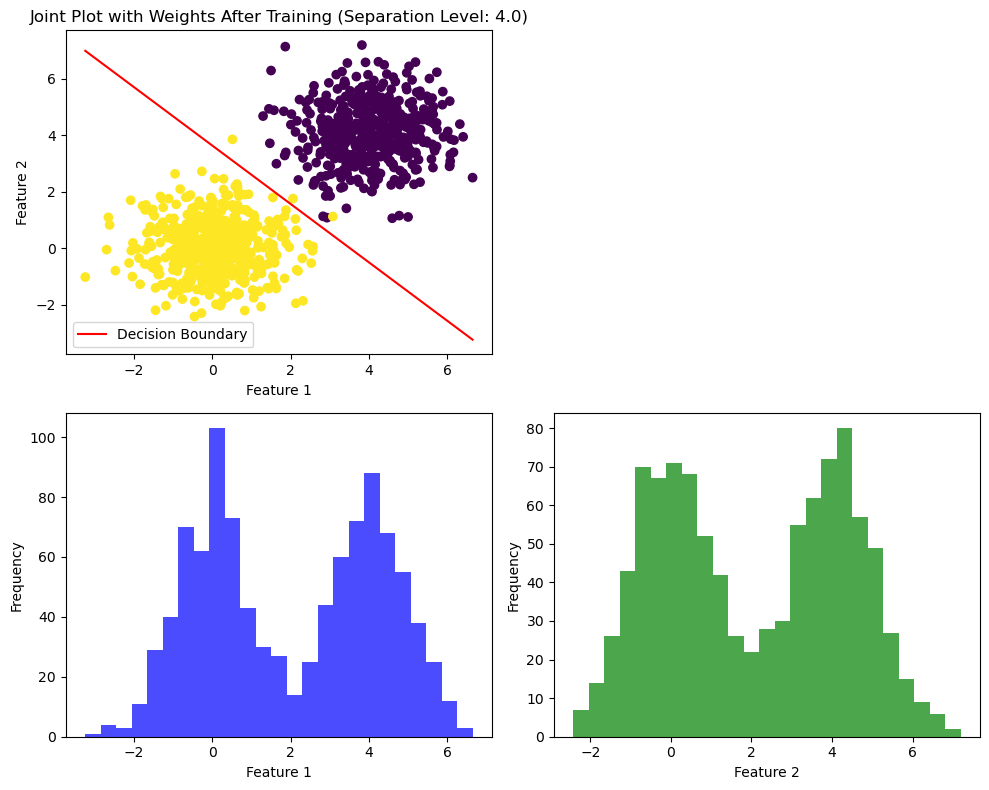

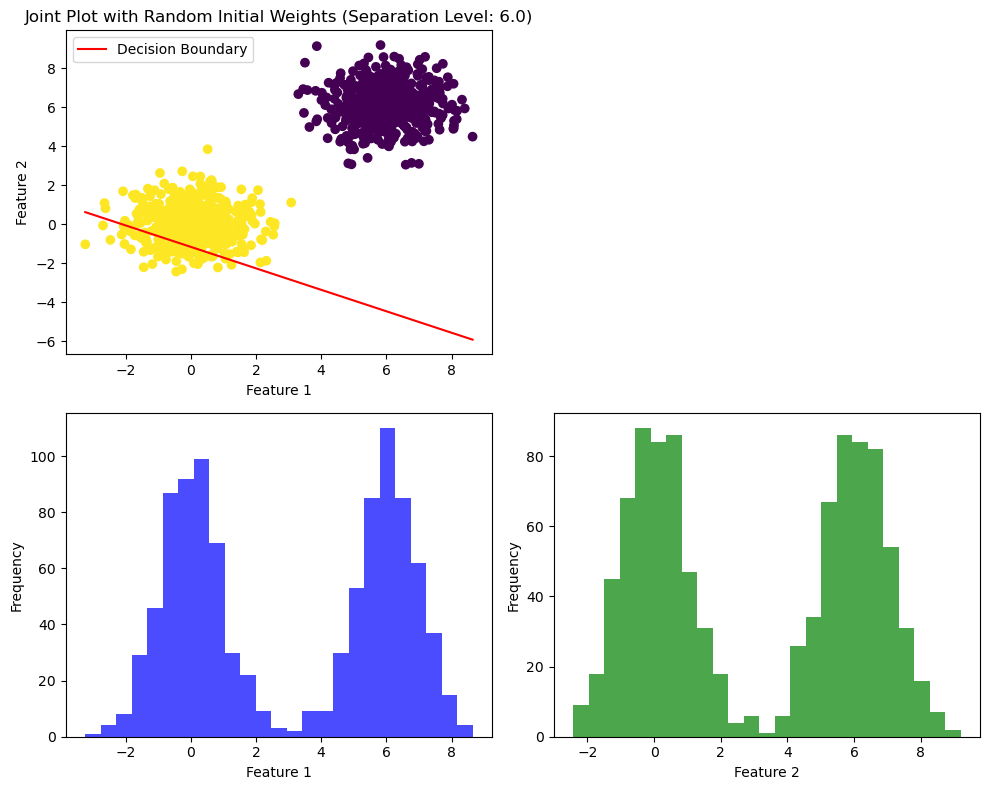

Early stopping at epoch number 3
Number of changes: 0


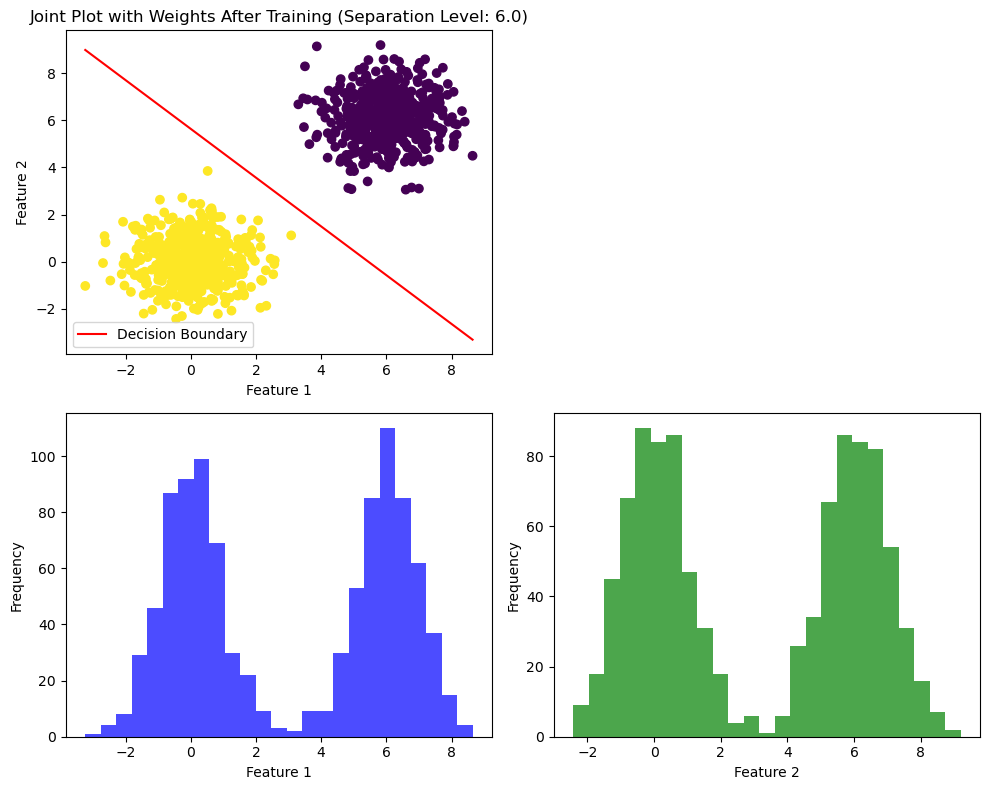

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_dataset(size, separation_level):
    np.random.seed(42)

    # Class 1 points
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    # Class 2 points with a clear separation
    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    # Combine the two classes
    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y.flatten()

def initialize_weights(num_features):
    return np.random.rand(num_features)

def train_perceptron(X, y, weights, nb_epochs_max):
    for epoch in range(nb_epochs_max):
        nb_changes = 0
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) * y[i] <= 0:
                weights = weights + y[i] * X[i]
                nb_changes += 1
        # Uncomment the next line if you want to print the number of changes every epoch
        # print('Number of changes: %d' % nb_changes)
        if nb_changes == 0:
            print('Early stopping at epoch number %d' % epoch)
            break

    print('Number of changes: %d' % nb_changes)
    return weights

def plot_joint_plot(X, y, weights, title):
    plt.figure(figsize=(10, 8))
    
    # Scatter plot with decision boundary
    plt.subplot(2, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Plot the decision boundary
    x_decision_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_decision_boundary = (-weights[0] / weights[1]) * x_decision_boundary - weights[2] / weights[1]
    plt.plot(x_decision_boundary, y_decision_boundary, '-r', label='Decision Boundary')
    plt.legend()

    # Histogram for Feature 1
    plt.subplot(2, 2, 3)
    plt.hist(X[:, 0], bins=25, color='blue', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Frequency')

    # Histogram for Feature 2
    plt.subplot(2, 2, 4)
    plt.hist(X[:, 1], bins=25, color='green', alpha=0.7)
    plt.xlabel('Feature 2')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage for different separation levels:
separation_levels = [2.0, 4.0, 6.0]  # Adjust as needed

for idx, separation_level in enumerate(separation_levels):
    X, y = generate_linearly_separable_dataset(1000, separation_level)

    # Initialize random weights (considering an extra bias term)
    random_weights = initialize_weights(X.shape[1] + 1)

    # Add bias term to the features
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

    # Plot joint plot with random initial weights
    plot_joint_plot(X_bias, y, random_weights, f'Joint Plot with Random Initial Weights (Separation Level: {separation_level})')

    # Initialize weights (considering an extra bias term)
    initial_weights = initialize_weights(X.shape[1] + 1)

    # Train perceptron
    trained_weights = train_perceptron(X_bias, y, initial_weights, nb_epochs_max=100)

    # Plot joint plot with weights after training
    plot_joint_plot(X_bias, y, trained_weights, f'Joint Plot with Weights After Training (Separation Level: {separation_level})')


Code by SG

Number of changes: 109


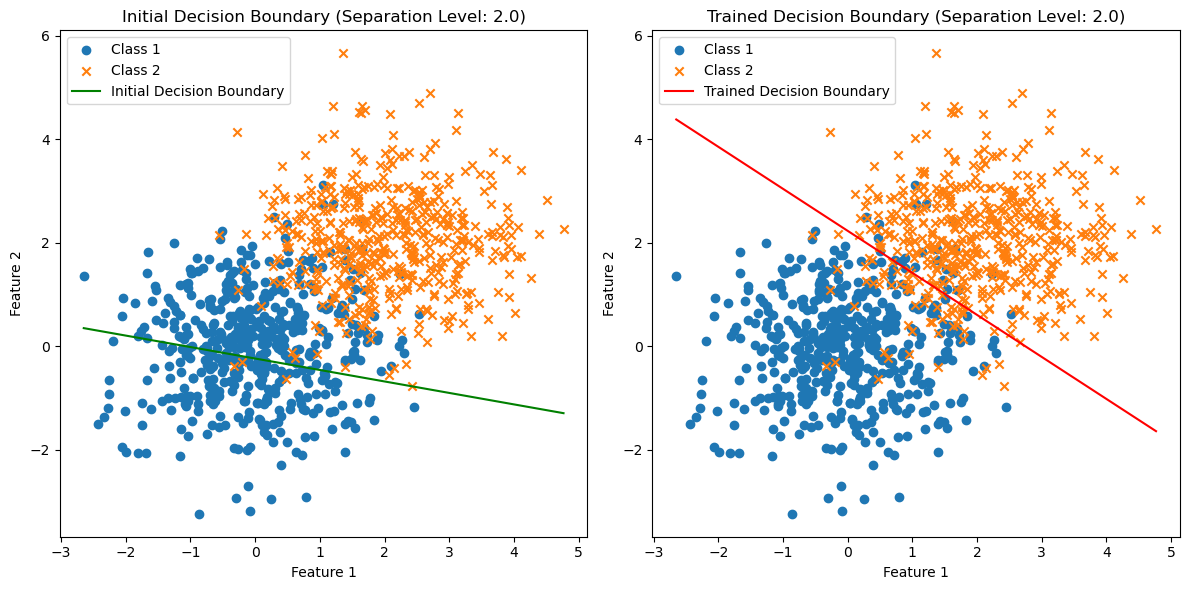

Early stopping at epoch number 57
Number of changes: 0


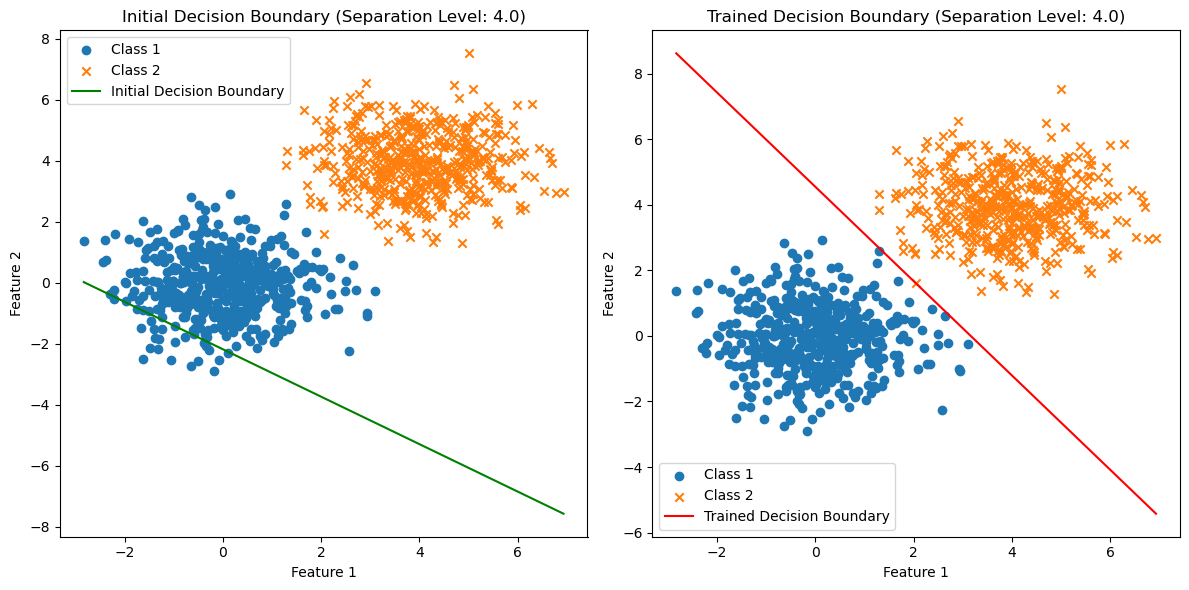

Early stopping at epoch number 1
Number of changes: 0


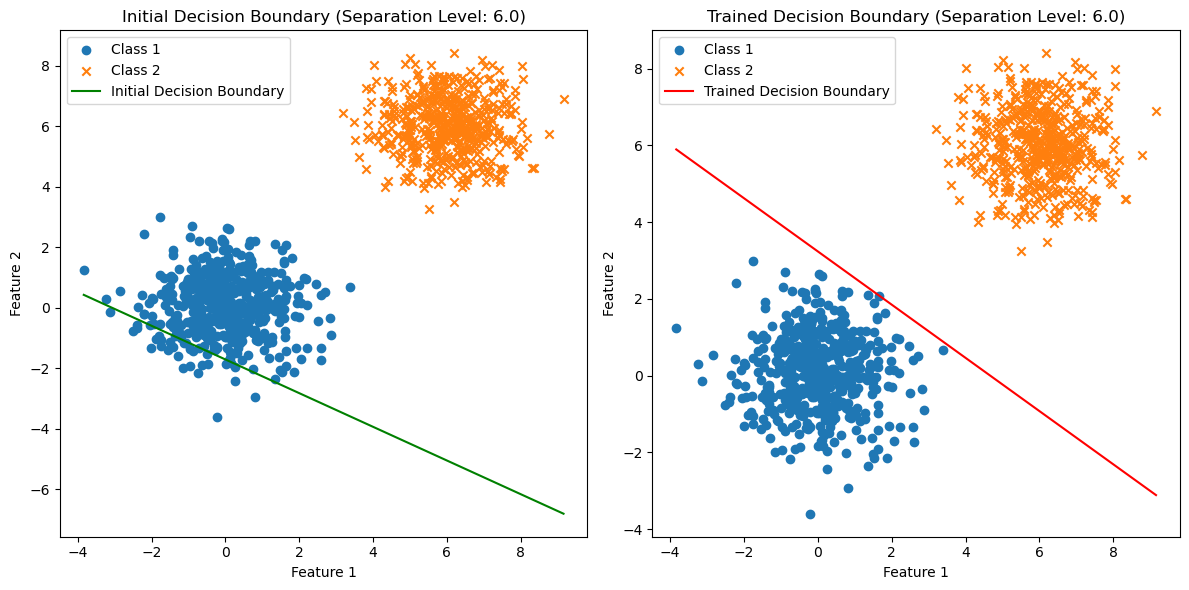

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_dataset(size, separation_level):
    # Class 1 points
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    # Class 2 points with a clear separation
    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    # Combine the two classes
    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y.flatten()

def initialize_weights(num_features):
    return np.random.rand(num_features)

def plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot initial decision boundary
    axes[0].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    axes[0].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    x_initial_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_initial_boundary = (-initial_weights[0] / initial_weights[1]) * x_initial_boundary - initial_weights[2] / initial_weights[1]
    axes[0].plot(x_initial_boundary, y_initial_boundary, '-g', label='Initial Decision Boundary')
    axes[0].set_title(f'Initial Decision Boundary (Separation Level: {separation_level})')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].legend()

    # Plot trained decision boundary
    axes[1].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    axes[1].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    x_trained_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_trained_boundary = (-trained_weights[0] / trained_weights[1]) * x_trained_boundary - trained_weights[2] / trained_weights[1]
    axes[1].plot(x_trained_boundary, y_trained_boundary, '-r', label='Trained Decision Boundary')
    axes[1].set_title(f'Trained Decision Boundary (Separation Level: {separation_level})')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

def train_perceptron(X, y, weights, nb_epochs_max):
    for epoch in range(nb_epochs_max):
        nb_changes = 0
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) * y[i] <= 0:
                weights = weights + y[i] * X[i]
                nb_changes += 1
        if nb_changes == 0:
            print('Early stopping at epoch number %d' % epoch)
            break

    print('Number of changes: %d' % nb_changes)
    return weights

# Example usage
separation_levels = [2.0, 4.0, 6.0]

for separation_level in separation_levels:
    X, y = generate_linearly_separable_dataset(1000, separation_level)

    # Initialize weights
    initial_weights = initialize_weights(X.shape[1] + 1)

    # Add bias term to the features
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

    # Train perceptron
    trained_weights = train_perceptron(X_bias, y, initial_weights, nb_epochs_max=100)

    # Plot the dataset with separate decision boundaries
    plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level)

2. Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our
classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent
update equation. Plot the dataset before and after training (with the classifier).


Epoch 1, Loss: 2.2122333694607095
Epoch 2, Loss: -10.85317792782178
Epoch 3, Loss: -9.832419484081722
Epoch 4, Loss: -9.190892401604485
Epoch 5, Loss: -8.820830229066651
Epoch 6, Loss: -8.579346631473376
Epoch 7, Loss: -8.383625557176662
Epoch 8, Loss: -8.249461516703645
Epoch 9, Loss: -8.138025118685013
Epoch 10, Loss: -8.042946314094102
Epoch 11, Loss: -7.962192394053167
Epoch 12, Loss: -7.889999610545226
Epoch 13, Loss: -7.831471318323103
Epoch 14, Loss: -7.783055860479606
Epoch 15, Loss: -7.747503062442915
Epoch 16, Loss: -7.716943632073707
Epoch 17, Loss: -7.689464309722328
Epoch 18, Loss: -7.665505627705195
Epoch 19, Loss: -7.6432173394485545
Epoch 20, Loss: -7.621052920279671
Epoch 21, Loss: -7.600443504177954
Epoch 22, Loss: -7.582688245285035
Epoch 23, Loss: -7.566635440638909
Epoch 24, Loss: -7.551543602474808
Epoch 25, Loss: -7.539181383791332
Epoch 26, Loss: -7.527751106712403
Epoch 27, Loss: -7.517355781366123
Epoch 28, Loss: -7.508826572152251
Epoch 29, Loss: -7.500723256

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20676\1996327102.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


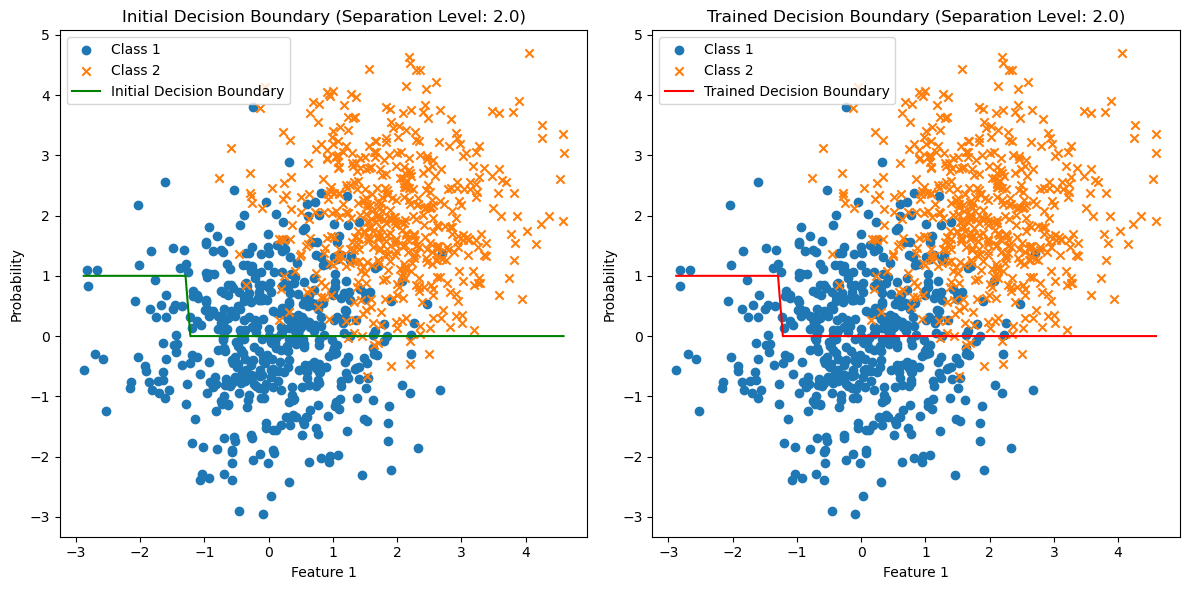

Epoch 1, Loss: 6.183016607578824
Epoch 2, Loss: -9.814637549335092
Epoch 3, Loss: -9.2997107420356
Epoch 4, Loss: -9.033195436254843
Epoch 5, Loss: -8.861405452754342
Epoch 6, Loss: -8.734397489226238
Epoch 7, Loss: -8.635863809552676
Epoch 8, Loss: -8.558344864220881
Epoch 9, Loss: -8.494015440125345
Epoch 10, Loss: -8.448932349857543
Epoch 11, Loss: -8.409240606003273
Epoch 12, Loss: -8.378041667774971
Epoch 13, Loss: -8.349582797790251
Epoch 14, Loss: -8.32592810013263
Epoch 15, Loss: -8.3089542541105
Epoch 16, Loss: -8.29215894565838
Epoch 17, Loss: -8.276680179756701
Epoch 18, Loss: -8.263411367421831
Epoch 19, Loss: -8.251567307120668
Epoch 20, Loss: -8.240314991400258
Epoch 21, Loss: -8.231748600447052
Epoch 22, Loss: -8.224236518717207
Epoch 23, Loss: -8.21763970828037
Epoch 24, Loss: -8.211039767263
Epoch 25, Loss: -8.204741978513754
Epoch 26, Loss: -8.199432850813015
Epoch 27, Loss: -8.194121564737062
Epoch 28, Loss: -8.188808255711244
Epoch 29, Loss: -8.183493029261774
Epoch

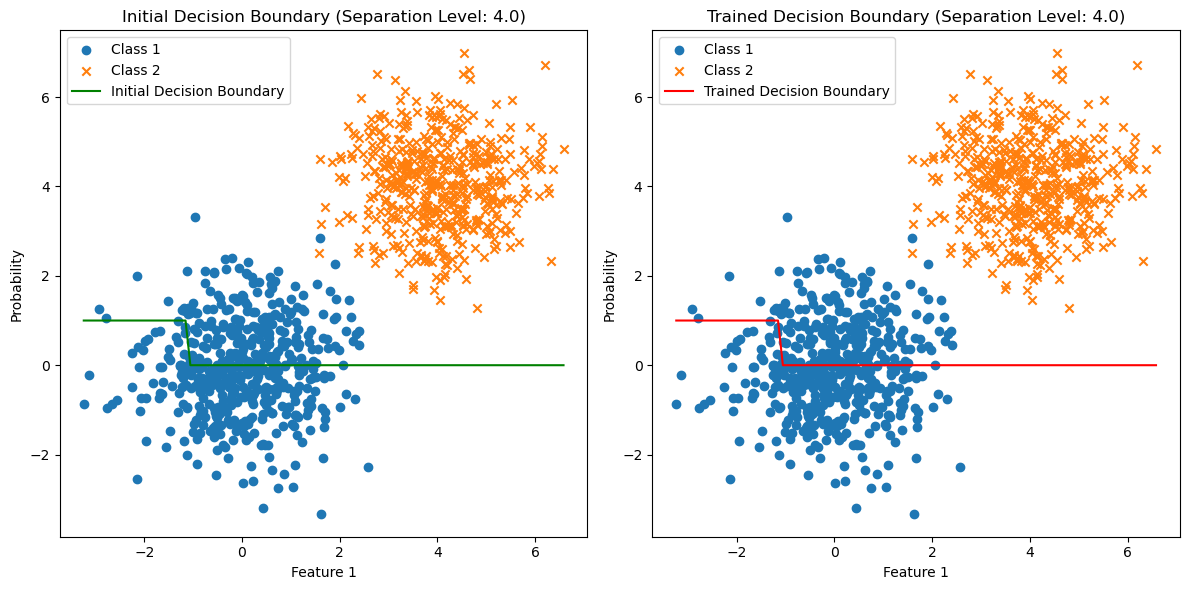

Epoch 1, Loss: 9.270964133618106
Epoch 2, Loss: -8.953975191423947
Epoch 3, Loss: -8.563723151970382
Epoch 4, Loss: -8.375850754568294
Epoch 5, Loss: -8.233244823593868
Epoch 6, Loss: -8.131435118946966
Epoch 7, Loss: -8.056282574481076
Epoch 8, Loss: -8.007296858422112
Epoch 9, Loss: -7.970636638436933
Epoch 10, Loss: -7.944538372417184
Epoch 11, Loss: -7.929445632000222
Epoch 12, Loss: -7.92138573703849
Epoch 13, Loss: -7.913352113969804
Epoch 14, Loss: -7.905287760158802
Epoch 15, Loss: -7.897199957346511
Epoch 16, Loss: -7.88977302149227
Epoch 17, Loss: -7.883661259057449
Epoch 18, Loss: -7.8775381920043746
Epoch 19, Loss: -7.87314945426838
Epoch 20, Loss: -7.869466096363297
Epoch 21, Loss: -7.866679269209327
Epoch 22, Loss: -7.863885912244928
Epoch 23, Loss: -7.861086390846867
Epoch 24, Loss: -7.858280991265894
Epoch 25, Loss: -7.855469956334695
Epoch 26, Loss: -7.852653508532334
Epoch 27, Loss: -7.84983186420465
Epoch 28, Loss: -7.847005241655841
Epoch 29, Loss: -7.84417386505286

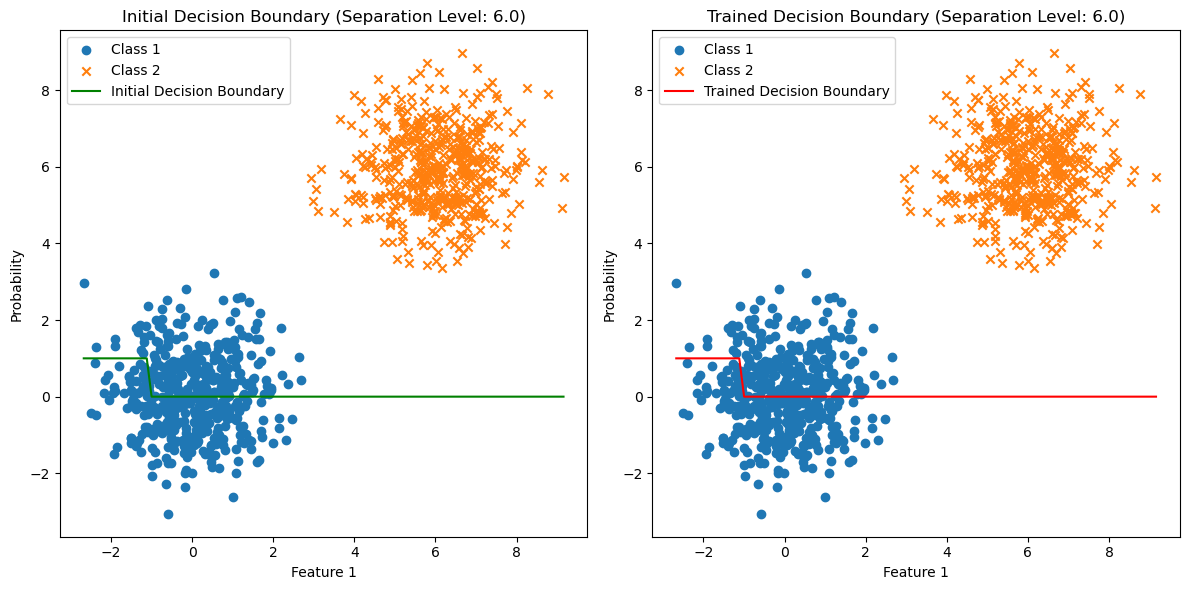

Epoch 1, Loss: 6.340771983935718
Epoch 2, Loss: -10.346685442299947
Epoch 3, Loss: -10.01956471590219
Epoch 4, Loss: -9.83455237434476
Epoch 5, Loss: -9.717076674459701
Epoch 6, Loss: -9.642685193245816
Epoch 7, Loss: -9.586019964243976
Epoch 8, Loss: -9.542315064875071
Epoch 9, Loss: -9.508312143409086
Epoch 10, Loss: -9.476208784638036
Epoch 11, Loss: -9.450356946110606
Epoch 12, Loss: -9.432106326015543
Epoch 13, Loss: -9.413848212407775
Epoch 14, Loss: -9.396978419955301
Epoch 15, Loss: -9.382097037607736
Epoch 16, Loss: -9.372948823945677
Epoch 17, Loss: -9.365729728264538
Epoch 18, Loss: -9.359742299324171
Epoch 19, Loss: -9.354910498508428
Epoch 20, Loss: -9.35182841981515
Epoch 21, Loss: -9.349876496871046
Epoch 22, Loss: -9.347924532134552
Epoch 23, Loss: -9.347209976755007
Epoch 24, Loss: -9.346741677011405
Epoch 25, Loss: -9.346273369276917
Epoch 26, Loss: -9.345805056901705
Epoch 27, Loss: -9.34533674182877
Epoch 28, Loss: -9.344868425186192
Epoch 29, Loss: -9.3444001076295

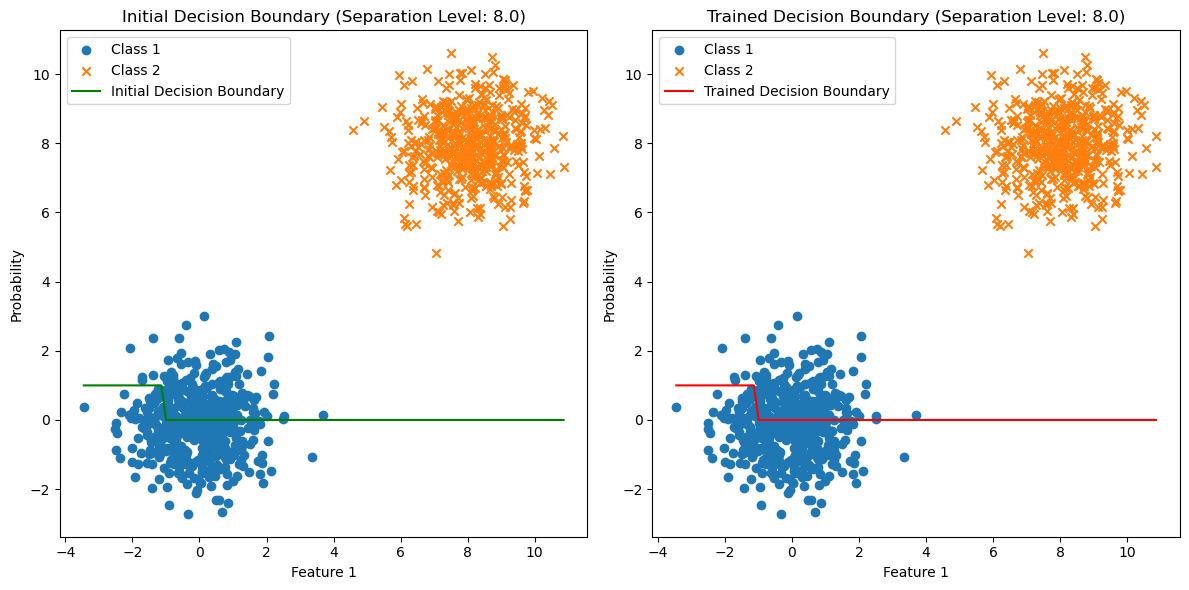

Epoch 1, Loss: 1.956031018923315
Epoch 2, Loss: -7.139100516657141
Epoch 3, Loss: -7.7926446582628
Epoch 4, Loss: -7.822864316122228
Epoch 5, Loss: -7.6516649246388395
Epoch 6, Loss: -7.418843227981498
Epoch 7, Loss: -7.2223519208268225
Epoch 8, Loss: -7.026108287321744
Epoch 9, Loss: -6.8375231143176025
Epoch 10, Loss: -6.685461657391752
Epoch 11, Loss: -6.560208327846656
Epoch 12, Loss: -6.445304624138002
Epoch 13, Loss: -6.343480029501367
Epoch 14, Loss: -6.264175224792863
Epoch 15, Loss: -6.193434666209867
Epoch 16, Loss: -6.122665625413527
Epoch 17, Loss: -6.056077408034676
Epoch 18, Loss: -5.99279856251859
Epoch 19, Loss: -5.928727807417472
Epoch 20, Loss: -5.8710124115734255
Epoch 21, Loss: -5.816800413563051
Epoch 22, Loss: -5.768289044547649
Epoch 23, Loss: -5.726054482083202
Epoch 24, Loss: -5.691913315726659
Epoch 25, Loss: -5.657696351360773
Epoch 26, Loss: -5.62427788070087
Epoch 27, Loss: -5.5882900623155285
Epoch 28, Loss: -5.552740521648697
Epoch 29, Loss: -5.5208819655

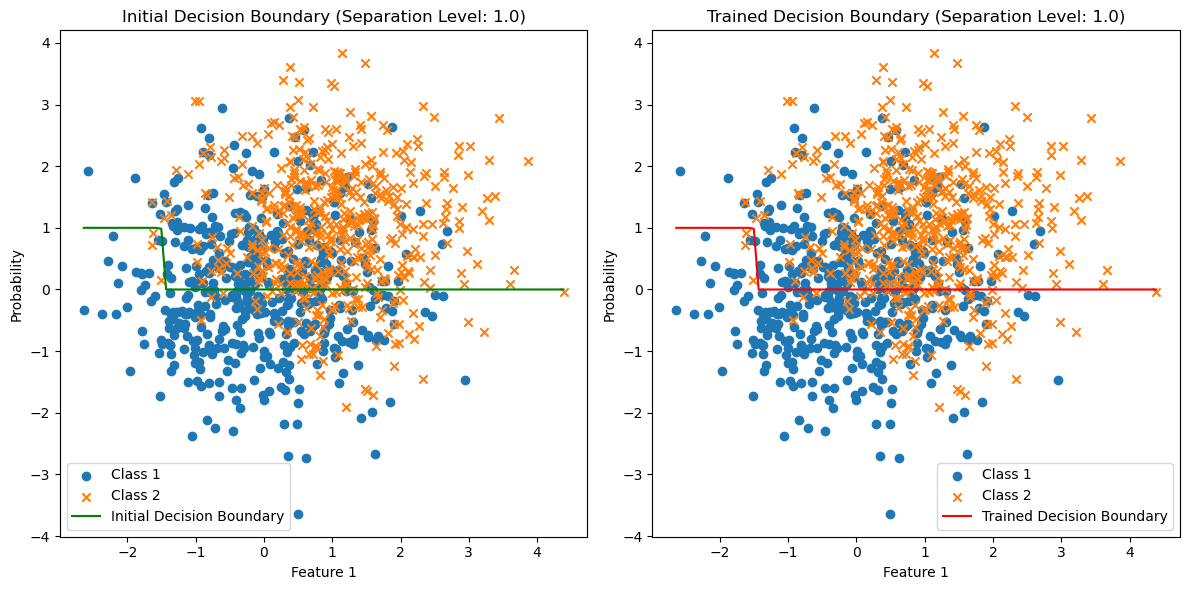

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_dataset(size, separation_level):
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y.flatten()

def initialize_weights(num_features):
    return np.random.rand(num_features)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_cross_entropy_loss(X, y, weights):
    scores = np.dot(X, weights)
    predictions = sigmoid(scores)
    grad = np.dot(X.T, predictions - y)
    return grad

def train_linear_classifier(X, y, weights, learning_rate, nb_epochs_max):
    for epoch in range(nb_epochs_max):
        # Compute cross-entropy loss
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)
        loss = cross_entropy_loss(y, predictions).mean()

        # Compute gradient of cross-entropy loss
        grad = gradient_cross_entropy_loss(X, y, weights)

        # Update weights using gradient descent
        weights -= learning_rate * grad

        # Print loss for monitoring convergence
        print(f'Epoch {epoch + 1}, Loss: {loss}')

    return weights

def plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot initial decision boundary
    axes[0].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    axes[0].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    x_initial_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_initial_scores = np.dot(np.hstack((x_initial_boundary.reshape(-1, 1), np.ones((100, 1)))), initial_weights[:-1].reshape(-1, 1)).flatten() + initial_weights[-1]
    y_initial_proba = sigmoid(y_initial_scores)
    axes[0].plot(x_initial_boundary, y_initial_proba, '-g', label='Initial Decision Boundary')
    axes[0].set_title(f'Initial Decision Boundary (Separation Level: {separation_level})')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Probability')
    axes[0].legend()

    # Plot trained decision boundary
    axes[1].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o')
    axes[1].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x')
    x_trained_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_trained_scores = np.dot(np.hstack((x_trained_boundary.reshape(-1, 1), np.ones((100, 1)))), trained_weights[:-1].reshape(-1, 1)).flatten() + trained_weights[-1]
    y_trained_proba = sigmoid(y_trained_scores)
    axes[1].plot(x_trained_boundary, y_trained_proba, '-r', label='Trained Decision Boundary')
    axes[1].set_title(f'Trained Decision Boundary (Separation Level: {separation_level})')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Probability')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Example usage
separation_levels = [2.0, 4.0, 6.0, 8.0, 1.0]

for separation_level in separation_levels:
    X, y = generate_linearly_separable_dataset(1000, separation_level)

    # Initialize weights
    initial_weights = initialize_weights(X.shape[1] + 1)

    # Add bias term to the features
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

    # Train linear classifier using gradient descent
    learning_rate = 0.01
    nb_epochs_max = 100
    trained_weights = train_linear_classifier(X_bias, y, initial_weights, learning_rate, nb_epochs_max)

    # Plot the dataset with separate decision boundaries
    plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level)
